In [1]:
import sys
sys.path.append("../spherical")
import spherical as spherical
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

In [2]:
%pylab inline
figsize(10,6)
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


# Kravchuk polynomials and the spherical GAF
To run an experiment, 
* we sample a realization of discrete white noise
* we compute its Kravchuk transform
* we find the zeros of the spectrogram, 
* we plot the signal, its spectrum, and the scalogram.

Figures will be saved in the current folder; file names will contain the id "demo".
The binomial parameters are N,p= 256 0.1
### Plotting the spectrogram.
There are 236 zeros


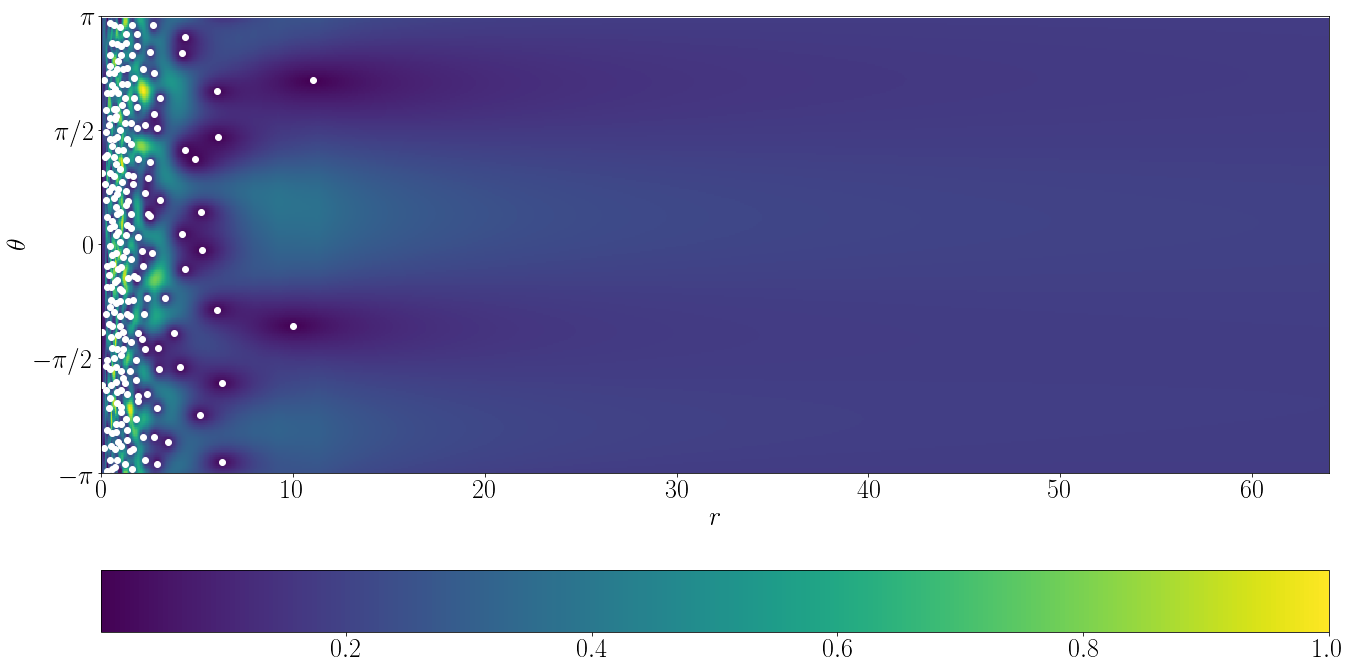

In [2]:
xp = spherical.SphericalExperiment(N=2**8, q=3)
xp.sampleWhiteNoise()

npr.seed(1)
xp.transform()
xp.findZeros(th = .3)
xp.plotResults()
print("There are", len(xp.zerosPolar), "zeros")

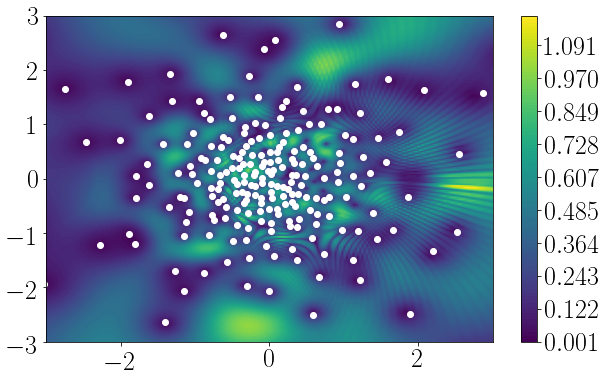

In [7]:
xp.plotTransformedResults()

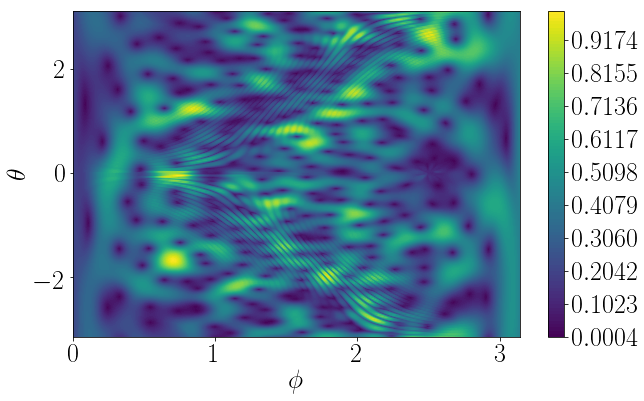

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:795: UserWarning: Rasterization of '<mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x1f2c3620b8>' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


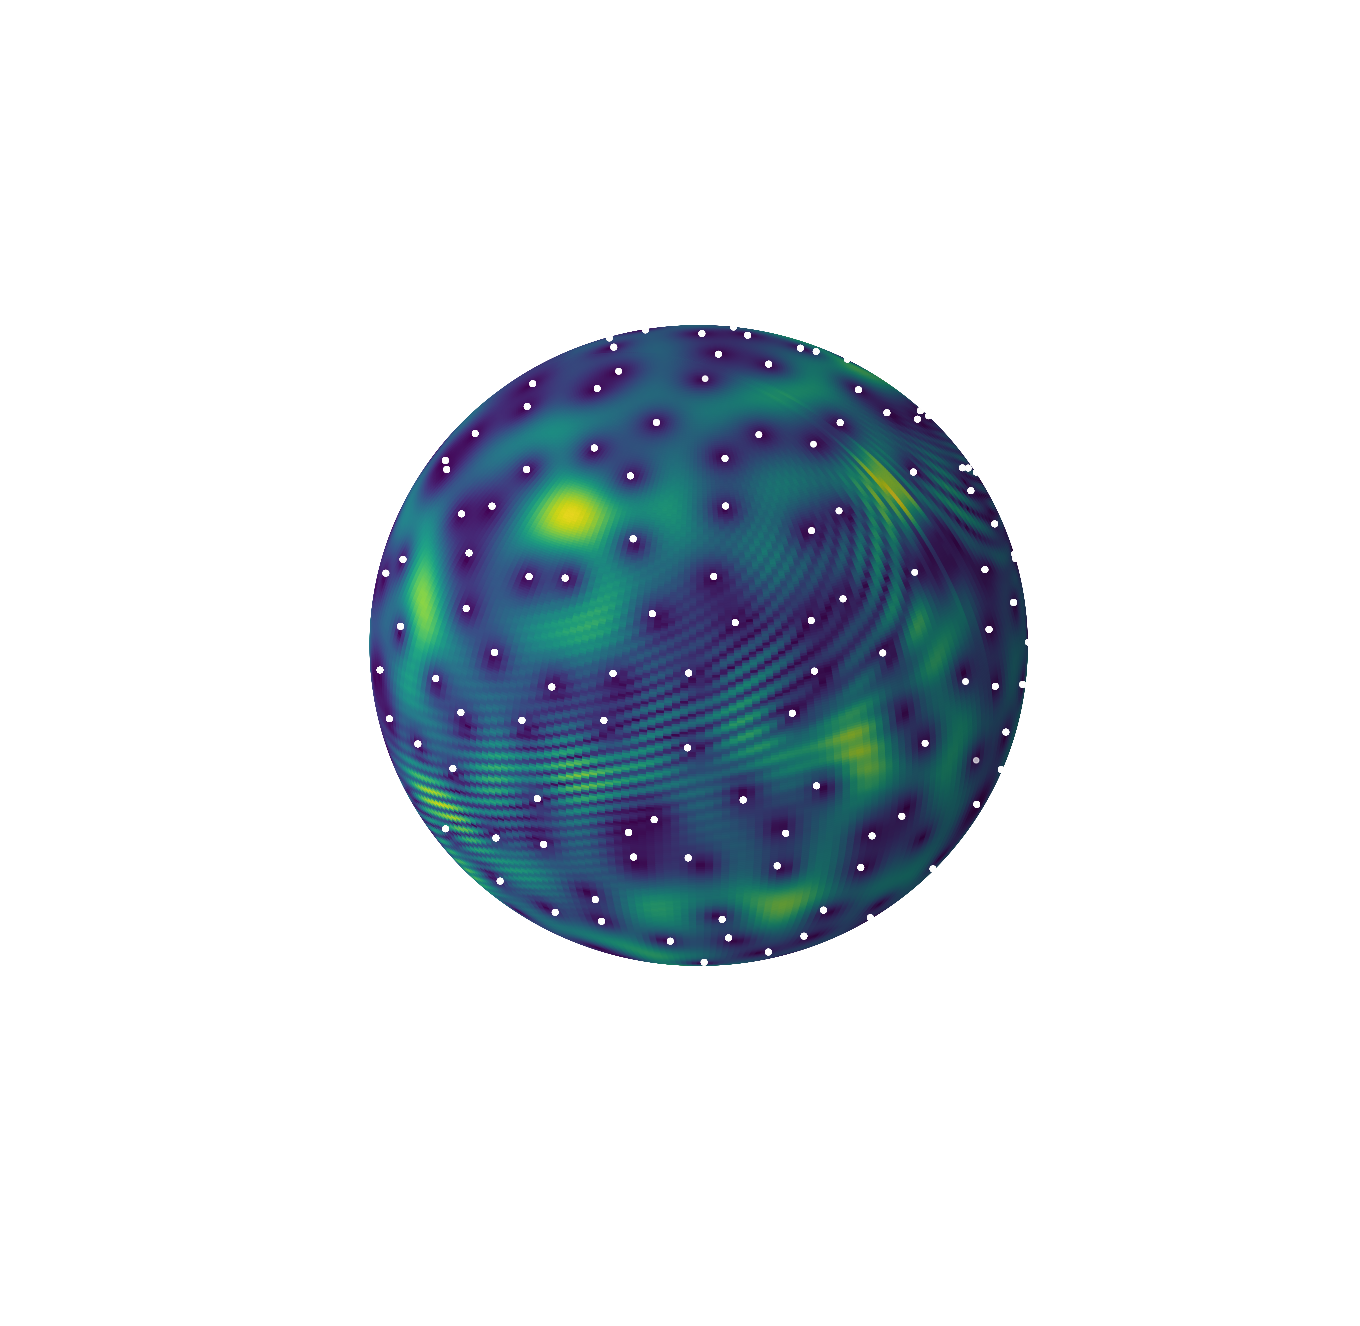

In [9]:
xp.plotSphericalResults()

## More about Kravchuk polynomials

In [2]:
from kravchuk import KravchukPolynomials, mu, cmb

In [4]:
import matplotlib as mpl
# Set plotting options
mpl.rcParams['xtick.labelsize'] = 26;
mpl.rcParams['ytick.labelsize'] = 26;
plt.rc('axes', labelsize=26);
plt.rc('legend', fontsize=18);
mpl.rcParams['ps.useafm'] = True;
mpl.rcParams['pdf.use14corefonts'] = True;
mpl.rcParams['text.usetex'] = True;

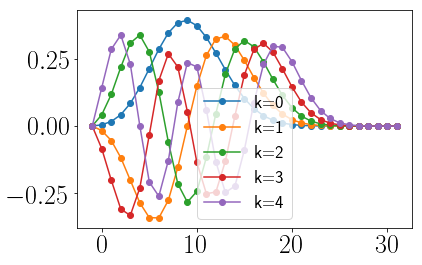

In [5]:
# Plot them
N = 30
p = .3
values = np.arange(-1,N+2)
index = 0
for c in KravchukPolynomials(N=N,p=p, n=6, values=values):
    plt.plot(values, c*np.sqrt(mu(N, p, values)), '-o', label="k="+str(index))
    index += 1
plt.legend()
plt.savefig("kravchukFunctions_N=30_p=0p3.pdf")
plt.savefig("kravchukFunctions_N=30_p=0p3.eps")
plt.show()

In [6]:
# Check orthonormality
for c in KravchukPolynomials(N=N, p=p, n=2, values=values):
    pp = c
for c in KravchukPolynomials(N=N, p=p, n=4, values=values):
    qq = c
    
print("total mass of base measure =", np.sum(mu(N,p,values)))
print("Squared norm of p =", np.sum(pp*pp*mu(N,p,values)))
print("Squared norm of q =", np.sum(qq*qq*mu(N,p,values)))
print("Inner product of p and q =", np.sum(pp*qq*mu(N,p,values)))

total mass of base measure = 0.9999999999999885
Squared norm of p = 0.9999999999999885
Squared norm of q = 1.0000000000000027
Inner product of p and q = -8.326672684688674e-17


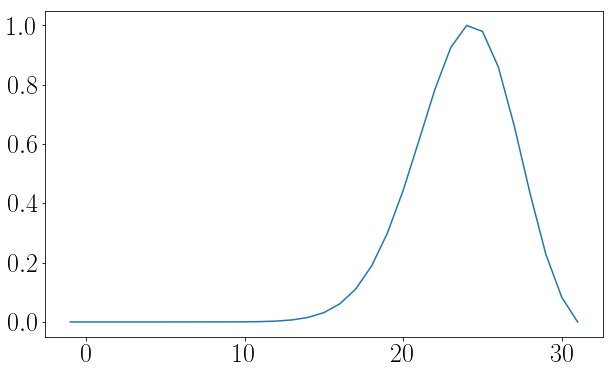

In [58]:
plt.plot(values, cmb(N, 2/3, values))
plt.show()

## Show the effect of a simple signal

Figures will be saved in the current folder; file names will contain the id "detection".
The binomial parameters are N,p= 256 0.5


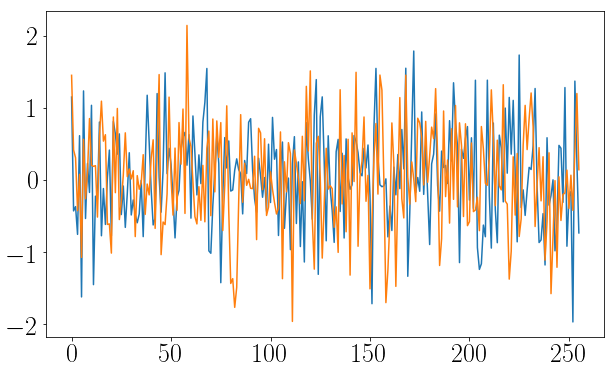

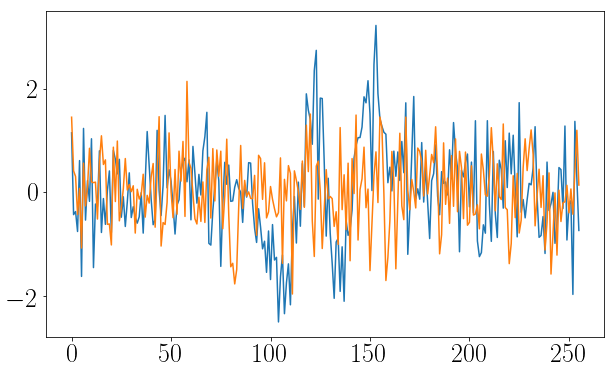

### Plotting the spectrogram.


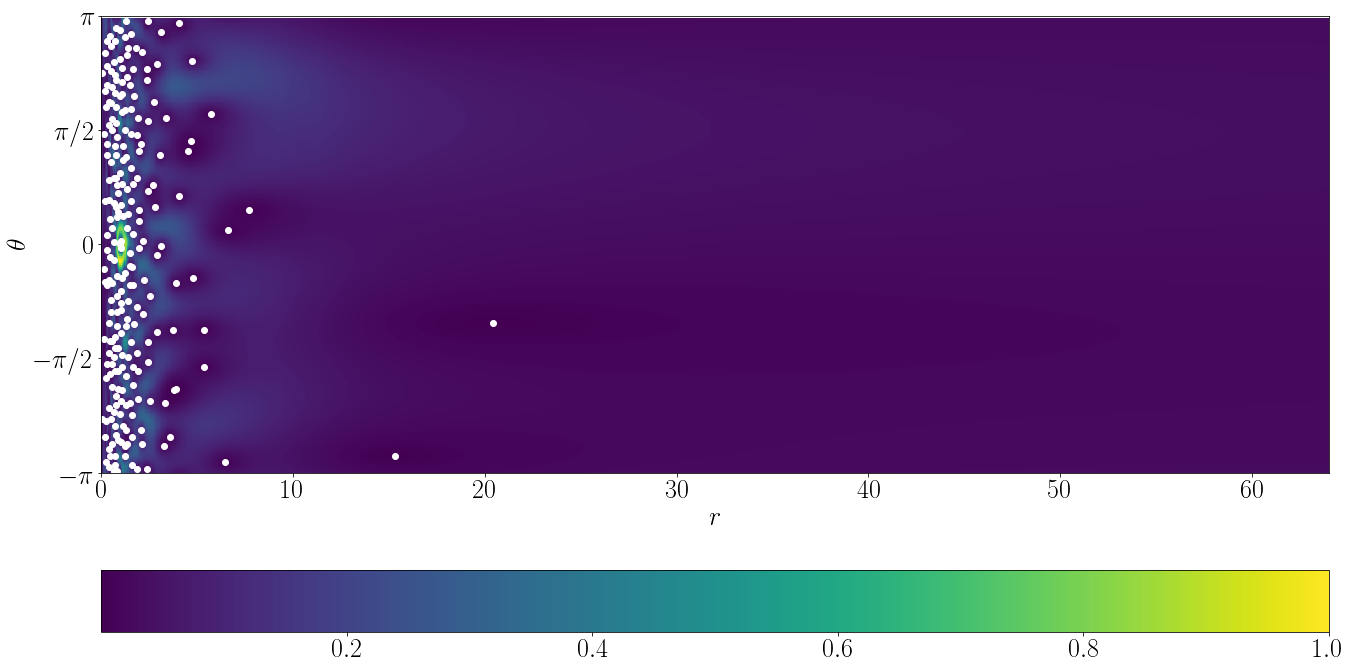

In [32]:
#%matplotlib nbagg
import kravchuk

npr.seed(1)
N = 2**8
xp = spherical.SphericalExperiment(N=N, q=1., expId="detection")
xp.sampleWhiteNoise()    

snr = 10
values = np.arange(xp.N)
plt.plot(np.real(xp.signal))
plt.plot(np.imag(xp.signal))
plt.show()

for s in KravchukPolynomials(N=N, p=xp.p, n=5, values=values):
    pp = s

xp.signal += snr*pp*np.sqrt(kravchuk.mu(N=N, p=xp.p, values=values)) # Add one Charlier function
plt.plot(np.real(xp.signal))
plt.plot(np.imag(xp.signal))
plt.show()

xp.transform()
xp.findZeros(th=.15)
xp.plotResults(boolShow=1)
plt.clf()

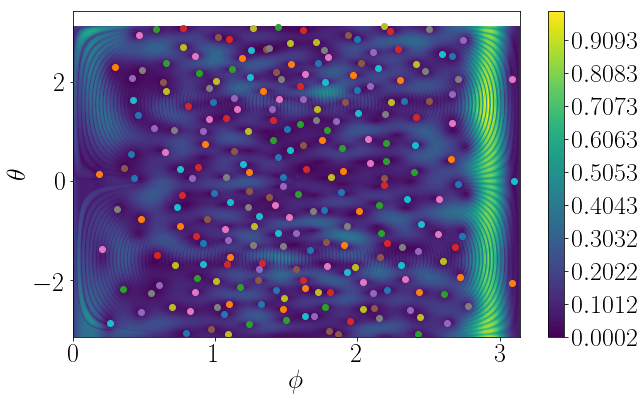

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:795: UserWarning: Rasterization of '<mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x1f335cd9b0>' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


hello 


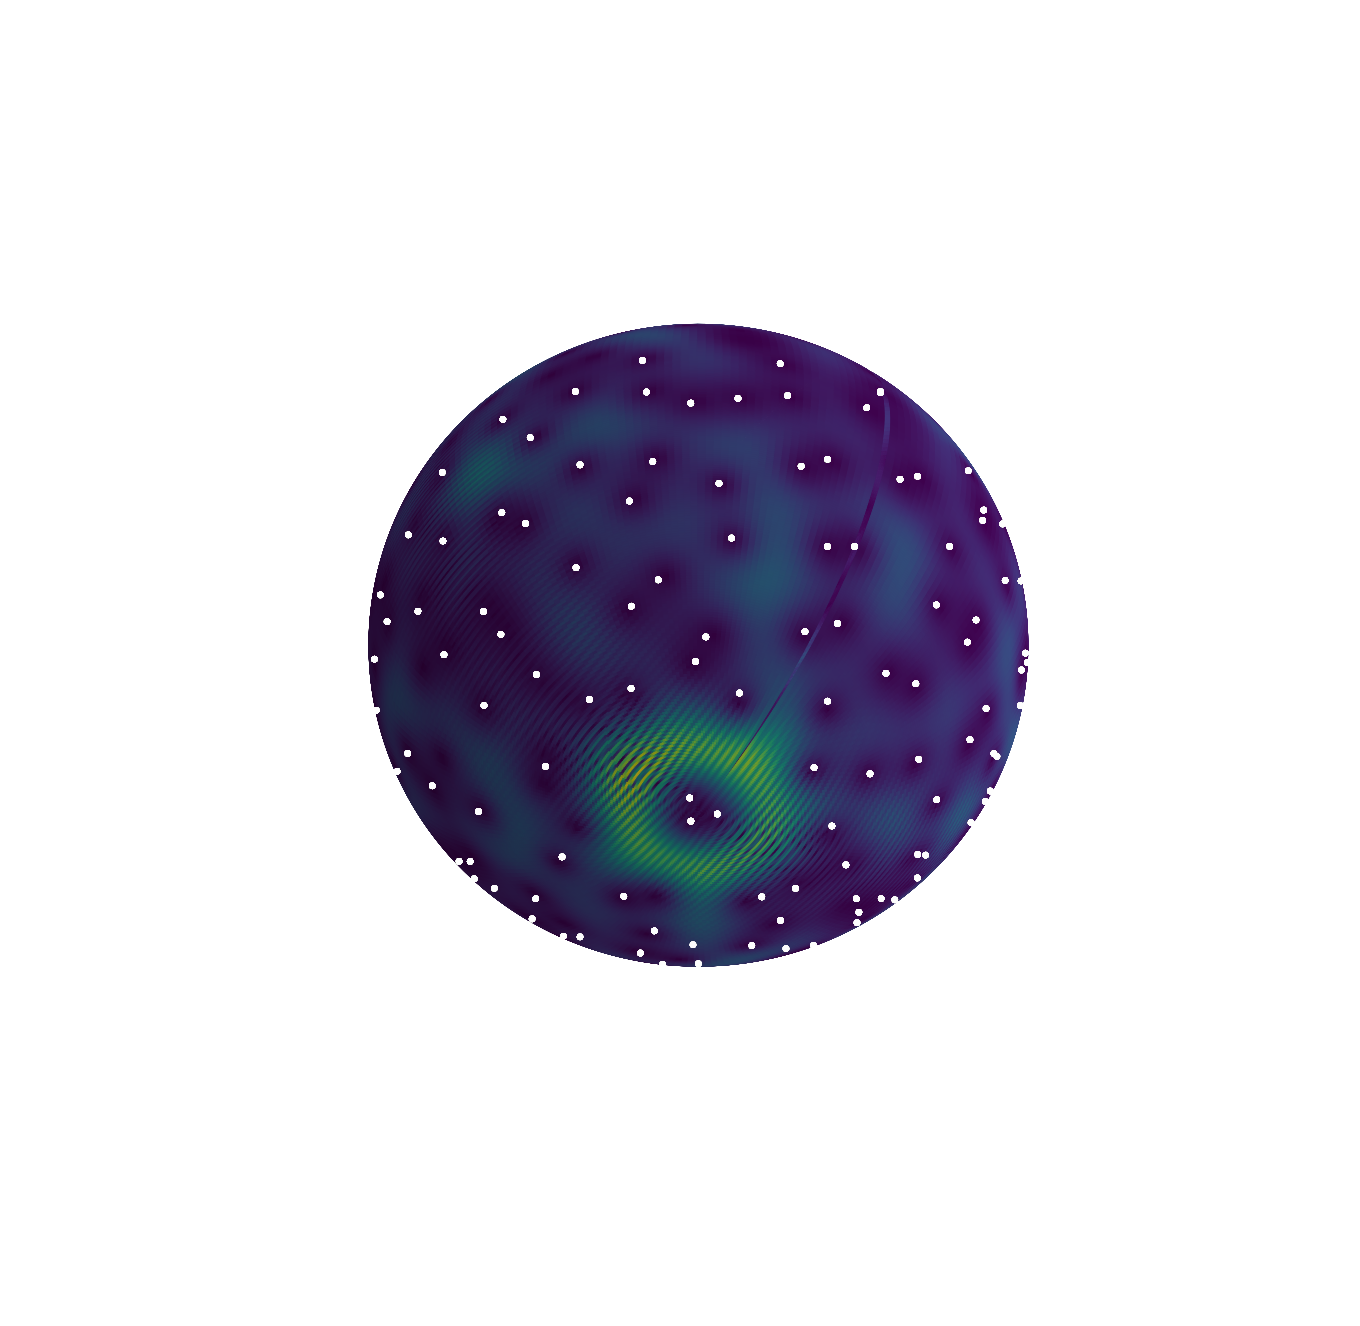

In [33]:
xp.plotSphericalResults()

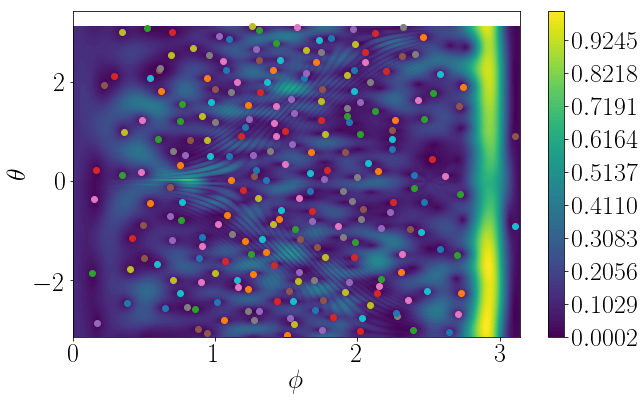

//anaconda/lib/python3.5/site-packages/matplotlib/artist.py:795: UserWarning: Rasterization of '<mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x1f1e23abe0>' will be ignored
  warnings.warn("Rasterization of '%s' will be ignored" % self)


hello 


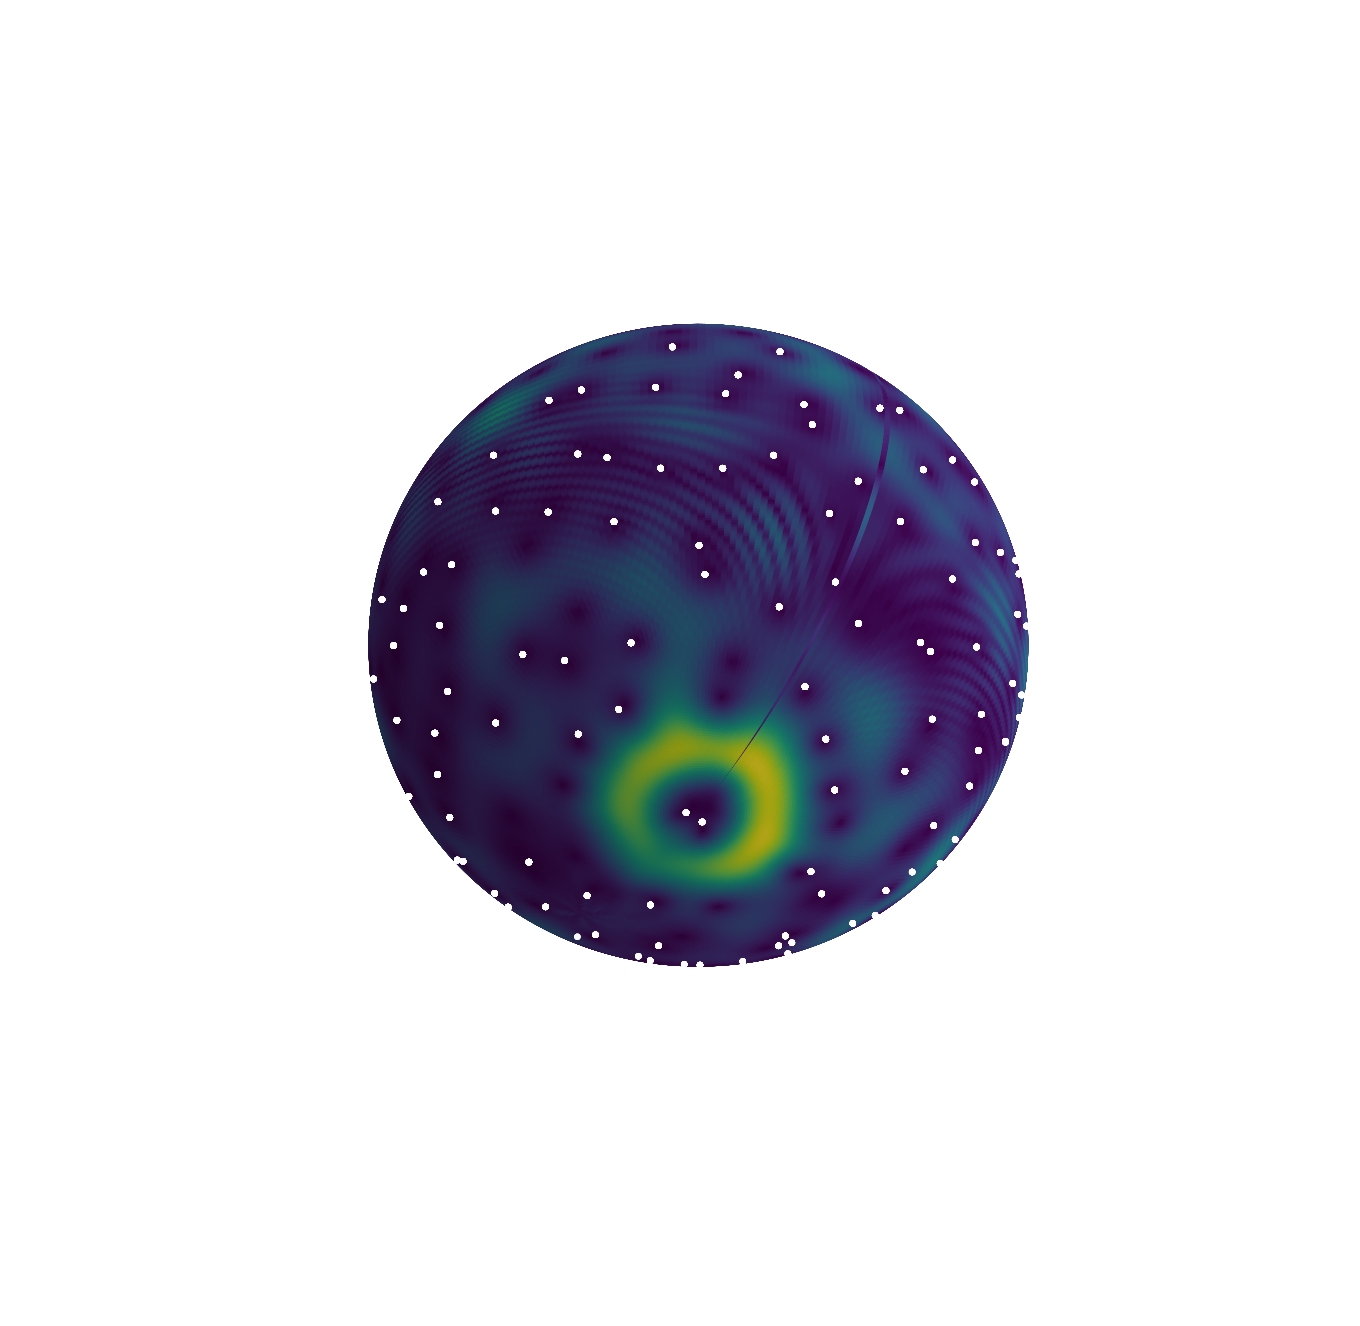

In [31]:
xp.plotSphericalResults()

In [6]:
2*np.arctan(-np.pi)

-2.525254511357823